In [21]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# For MedMNIST pre-processed data
data = np.load('bloodmnist_224.npz')
image_array = data['train_images'][1]

In [22]:
# Load image with alpha channel
image = Image.open('PhMN- et.png').convert('RGBA')
image_array = np.array(image)

In [23]:
# Calculate luminance
rgb_array = image_array[..., :3]
luminance = np.dot(rgb_array, [0.2989, 0.5870, 0.1140])

# Initialize activation mask
activated_mask = np.zeros_like(luminance, dtype=bool)

# Define thresholds
thresholds = np.arange(0, 264, 16)

# Apply thresholds
thresholded_images = []

for threshold in thresholds:
    new_activation = luminance <= threshold
    activated_mask = activated_mask | new_activation
    
    # Create a new image with white background and alpha channel
    current_image = np.ones_like(image_array) * 255
    for c in range(3):  # RGB channels
        current_image[..., c] = np.where(activated_mask, image_array[..., c], 255)
    # Copy the alpha channel
    current_image[..., 2] = image_array[..., 2]
    
    thresholded_images.append(current_image.astype(np.uint8))


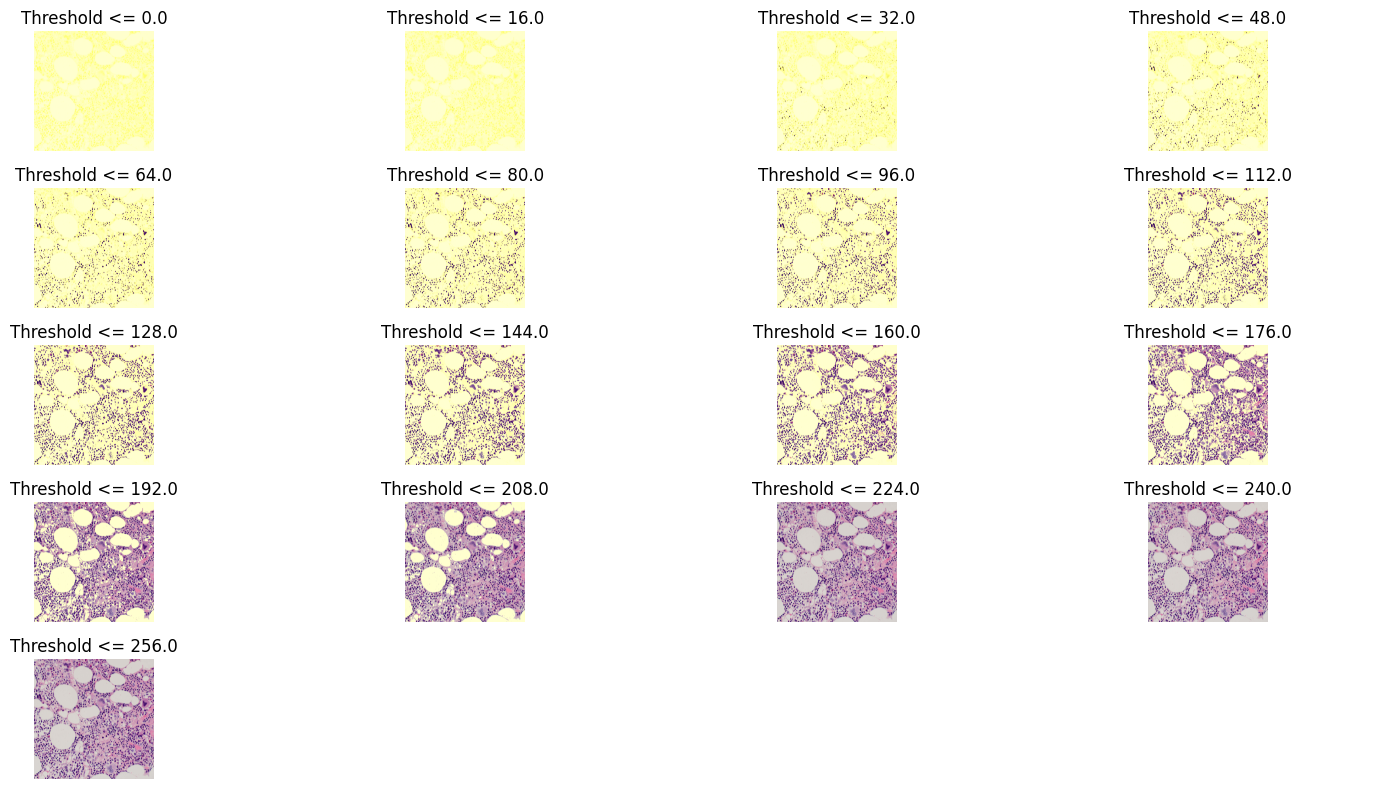

In [24]:
# Determine the number of rows and columns for subplots
num_images = len(thresholded_images)
cols = 4  # Adjust as needed
rows = num_images // cols + int(num_images % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for idx, (ax, img) in enumerate(zip(axes, thresholded_images)):
    ax.imshow(img)
    ax.set_title(f'Threshold <= {thresholds[idx]:.1f}')
    ax.axis('off')

# Hide any unused subplots
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


### Save Individual Figures

In [25]:
# Loop over the images and save each one
for idx, img in enumerate(thresholded_images):
    plt.imsave(f'PhMN-et_threshold_{idx}.png', img.astype(np.uint8))


### Animation Saved as a GIF

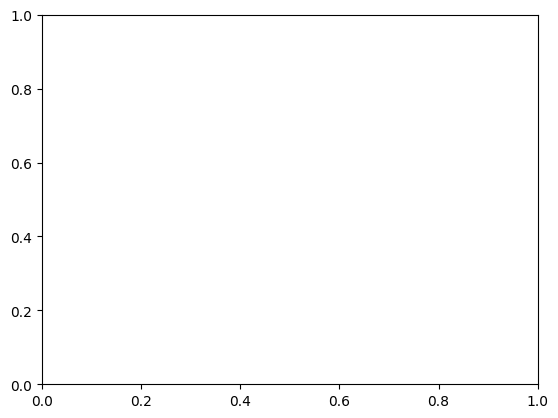

MovieWriter imagemagick unavailable; using Pillow instead.


In [20]:
import matplotlib.animation as animation

def create_animation():
    fig, ax = plt.subplots()

    def animate(i):
        ax.clear()
        ax.imshow(thresholded_images[i])
        ax.set_title(f'Threshold <= {thresholds[i]:.1f}')
        ax.axis('off')

    ani = animation.FuncAnimation(fig, animate, frames=len(thresholded_images), interval=500)
    plt.show()
    return ani

# Call the function and keep the animation object
ani = create_animation()

ani.save('PhMN-et.gif', writer='imagemagick')